## <center> Exploring fundamental business problems with Python Pandas </center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('data.csv',encoding='ISO-8859-1')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


#### From the info command, we can notice some missing data in Description and Customer ID columns. Since we have a large dataset, let us drop these rows for further analysis

In [8]:
df.dropna(inplace=True)

In [9]:
df['CustomerID']=df['CustomerID'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int32  
 7   Country      406829 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 26.4+ MB


Invoice Date column needs to be converted to datetime format

In [11]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

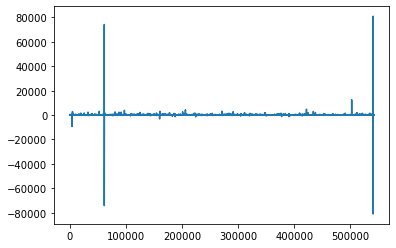

In [12]:
df['Quantity'].plot()

#### By plotting the quantity of products ordered, we can see that there are some huge negative values. This may be due to return of products. Let's verify our doubts

In [13]:
refunds=df[df['Quantity']<0]

In [14]:
refunds.sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom
...,...,...,...,...,...,...,...,...
349851,C567536,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-09-21 09:52:00,7.95,14284,United Kingdom
349871,C567540,23173,REGENCY TEAPOT ROSES,-1,2011-09-21 10:00:00,9.95,12384,Switzerland
176843,C552029,20982,12 PENCILS TALL TUBE SKULLS,-1,2011-05-05 18:11:00,0.85,15622,United Kingdom
176839,C552029,22681,FRENCH BLUE METAL DOOR SIGN 6,-1,2011-05-05 18:11:00,1.25,15622,United Kingdom


In [15]:
df[df['CustomerID']==16446]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [16]:
df[df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


#### By looking at the top two Customer ID with maximum returns, we can see that both the ordered and returned transactions are available in our dataset. So instead of simply dropping the negative quantity rows, we can create a new column with the amount spent per invoice.
#### Another minor observations is that the invoice numbers starting with 'C' seems to be return orders. Let us check this out

In [17]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Lets filter out the Invoice numbers starting with the letter C

In [19]:
df[df['InvoiceNo'].str.contains(r'^C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


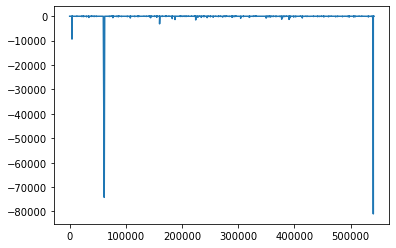

In [20]:
df[df['InvoiceNo'].str.contains(r'^C')]['Quantity'].plot()

#### As we expected, all Invoice numbers starting with 'C' are return orders

## 1. Which was the best month in terms of Sales?

To solve this, we need to see the duration of our dataset and create a new month column

In [21]:
df['InvoiceDate'].describe()

count                  406829
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

#### We have all invoices from Dec 1st 2010 to  Dec 9th 2011. To get data for exactly one year, lets remove all data after Nov 30 2011 and create a new month column

In [22]:
df_annual=df[df['InvoiceDate']<='2011-11-30']

In [23]:
df_annual['Month']=df['InvoiceDate'].dt.to_period('M')

<ipython-input-23-6eca9adbe270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annual['Month']=df['InvoiceDate'].dt.to_period('M')


In [24]:
df_annual

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
512925,579520,22229,BUNNY WOODEN PAINTED WITH FLOWER,1,2011-11-29 18:14:00,0.39,12748,United Kingdom,0.39,2011-11
512926,579520,23344,JUMBO BAG 50'S CHRISTMAS,1,2011-11-29 18:14:00,2.08,12748,United Kingdom,2.08,2011-11
512927,C579521,22307,GOLD MUG BONE CHINA TREE OF LIFE,-6,2011-11-29 18:19:00,1.06,12748,United Kingdom,-6.36,2011-11
512928,C579521,21843,RED RETROSPOT CAKE STAND,-1,2011-11-29 18:19:00,10.95,12748,United Kingdom,-10.95,2011-11


In [25]:
Monthly_sales=df_annual.groupby('Month')['Amount'].sum()

In [26]:
Monthly_sales

Month
2010-12     554604.020
2011-01     475074.380
2011-02     436546.150
2011-03     579964.610
2011-04     426047.851
2011-05     648251.080
2011-06     608013.160
2011-07     574238.481
2011-08     616368.000
2011-09     931440.372
2011-10     974603.590
2011-11    1091886.890
Freq: M, Name: Amount, dtype: float64

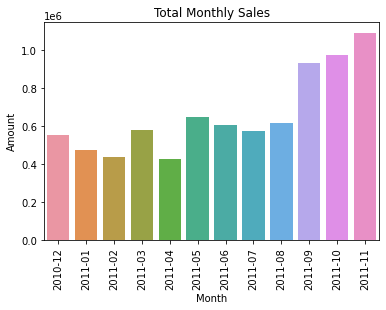

In [27]:
ax=sns.barplot(x=Monthly_sales.index,y=Monthly_sales)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Total Monthly Sales')
plt.show()

### From the bar graph, it is clear that November 2011 had the Peak Sales

## 2. Which countries placed the most number of orders?

In [28]:
countries=df_annual.groupby('Country').count()['InvoiceNo']

In [29]:
top_countries=countries.nlargest(10)
top_countries

Country
United Kingdom    343960
Germany             9139
France              8009
EIRE                7107
Spain               2462
Netherlands         2281
Belgium             1971
Switzerland         1877
Portugal            1377
Australia           1259
Name: InvoiceNo, dtype: int64

### We can see that United Kingdom has the most number of orders. This is mostly because this E-commerce platform is set up in the UK. So lets ignore UK and find the foreign country with most number of orders

In [30]:
top_countries.drop(index='United Kingdom',inplace=True)

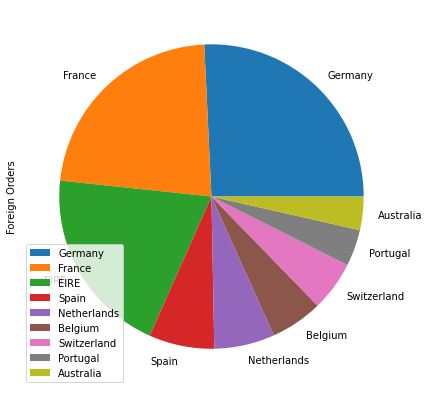

In [31]:
top_countries.rename('Foreign Orders',inplace=True)
top_countries.plot.pie(y='Foreign Orders',figsize=(7, 7))
plt.legend(loc='lower left')
plt.show()

### From the pie chart it is clear that Germany is the foreign country with most number of orders, followed by France and EIRE (Ireland)

## 3. What is the best time to display advertisements so as to attract maximum customers?

In [54]:
df['Hour']=df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8


In [57]:
hourly_orders=df.groupby('Hour').count()['InvoiceNo']

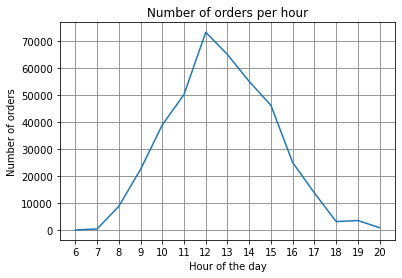

In [73]:
plt.plot(hourly_orders.index,hourly_orders)
plt.xticks(hourly_orders.index)
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.title('Number of orders per hour')
plt.grid(True, color = "grey")
plt.show()

### It is clear from the above line graph that 11AM to 2PM witnessed the highest number of orders. Hence it is best to display advertisement during this period.

## 4. Which two products are often bought together?

In [107]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12


### In order to solve this problem:
* Select all rows with duplicated Invoice numbers to filter out group purchases.
* Add a new column comprising of names of all the products bought together, seperated by a distinct delimiter.
* Drop duplicated rows of same invoice number
* Use itertools and collections libraries for efficient looping and counting different combinations


In [138]:
df_repeats=df[df['InvoiceNo'].duplicated(keep=False)]

In [147]:
df_repeats['Description'].str.contains(',').value_counts()

False    400351
True       3083
Name: Description, dtype: int64

In [152]:
df_repeats['Description'].str.contains('%').value_counts()

False    403434
Name: Description, dtype: int64

In [153]:
df_repeats['Grouped']=df_repeats.groupby('InvoiceNo')['Description'].transform(lambda x : '%'.join(x))

<ipython-input-153-651725b1f56d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeats['Grouped']=df_repeats.groupby('InvoiceNo')['Description'].transform(lambda x : '%'.join(x))


In [156]:
df_repeats

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Hour,Grouped
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,WHITE HANGING HEART T-LIGHT HOLDER%WHITE METAL...
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,WHITE HANGING HEART T-LIGHT HOLDER%WHITE METAL...
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,WHITE HANGING HEART T-LIGHT HOLDER%WHITE METAL...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,WHITE HANGING HEART T-LIGHT HOLDER%WHITE METAL...
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,WHITE HANGING HEART T-LIGHT HOLDER%WHITE METAL...
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,CIRCUS PARADE LUNCH BOX %PLASTERS IN TIN CIRCU...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,CIRCUS PARADE LUNCH BOX %PLASTERS IN TIN CIRCU...
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,CIRCUS PARADE LUNCH BOX %PLASTERS IN TIN CIRCU...
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,CIRCUS PARADE LUNCH BOX %PLASTERS IN TIN CIRCU...


In [157]:
df_repeats[['InvoiceNo','Grouped']].drop_duplicates()

,InvoiceNo,Grouped
0,536365,WHITE HANGING HEART T-LIGHT HOLDER%WHITE METAL...
7,536366,HAND WARMER UNION JACK%HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT%POPPY'S PLAYHOUS...
21,536368,JAM MAKING SET WITH JARS%RED COAT RACK PARIS F...
26,536370,ALARM CLOCK BAKELIKE PINK%ALARM CLOCK BAKELIKE...
...,...,...
541865,581583,LUNCH BAG RED RETROSPOT%6 CHOCOLATE LOVE HEART...
541867,581584,RED FLOCK LOVE HEART PHOTO FRAME%6 CHOCOLATE L...
541869,581585,BLACK TEA TOWEL CLASSIC DESIGN%ASSORTED BOTTLE...
541890,581586,LARGE CAKE STAND HANGING STRAWBERY%SET OF 3 H...


In [158]:
from itertools import combinations
from collections import Counter

In [159]:
count=Counter()

for i in df_repeats['Grouped']:
    ilist= i.split('%')
    count.update(Counter(combinations(ilist,2)))

#### Display the top 10 items that are commonly bought together along with the number of occurences they were bought together

In [160]:
for i,j in count.most_common(10):
    print(i,j)

('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER') 26608
('SET OF 3 WOODEN HEART DECORATIONS', 'SET OF 3 WOODEN STOCKING DECORATION') 20042
('SET OF 3 WOODEN HEART DECORATIONS', 'SET OF 3 WOODEN SLEIGH DECORATIONS') 18758
('SET OF 3 WOODEN HEART DECORATIONS', 'SET OF 3 WOODEN TREE DECORATIONS') 17980
('GARDENERS KNEELING PAD CUP OF TEA ', 'GARDENERS KNEELING PAD KEEP CALM ') 17035
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.') 16871
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT') 16484
("PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS') 15899
('SET OF 3 WOODEN SLEIGH DECORATIONS', 'SET OF 3 WOODEN STOCKING DECORATION') 15670
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ') 15284


### Here, we can see the items which are often bought together. This can be useful to suggest products that consumers are likely to purchase, based on the items in their cart.

## Top Customers based on Amount spent

In [114]:
top_10=df.groupby('CustomerID').sum()['Amount'].nlargest(10)

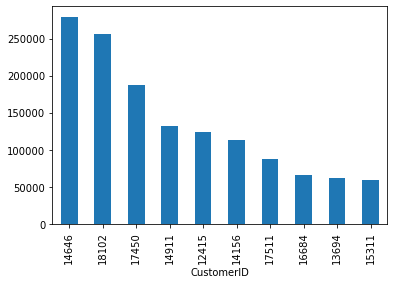

In [134]:
top_10.plot(kind='bar',x=top_10.index,y=top_10)
plt.show()